In [17]:
import requests
import pandas as pd
from tqdm.auto import tqdm

url_prefix = 'https://raw.githubusercontent.com/DataTalksClub/llm-zoomcamp/main/03-evaluation/'
docs_url = url_prefix + 'search_evaluation/documents-with-ids.json'
documents = requests.get(docs_url).json()

ground_truth_url = url_prefix + 'search_evaluation/ground-truth-data.csv'
df_ground_truth = pd.read_csv(ground_truth_url)
df_ground_truth = df_ground_truth[df_ground_truth.course == 'machine-learning-zoomcamp']
ground_truth = df_ground_truth.to_dict(orient='records')

In [18]:
from sentence_transformers import SentenceTransformer

model_name = 'multi-qa-MiniLM-L6-cos-v1'
model = SentenceTransformer(model_name)

In [19]:
gpt_35_url = url_prefix + 'rag_evaluation/data/results-gpt35.csv'
gpt_4o_url = url_prefix + 'rag_evaluation/data/results-gpt4o.csv'
gpt_4o_mini_url = url_prefix + 'rag_evaluation/data/results-gpt4o-mini.csv'

df_gpt35 = pd.read_csv(gpt_35_url)
df_gpt4o = pd.read_csv(gpt_4o_url)
df_gpt4o_mini = pd.read_csv(gpt_4o_mini_url)

In [20]:
results_gpt4o = df_gpt4o.to_dict(orient='records')

In [21]:
def compute_similarity(record):
    answer_orig = record['answer_orig']
    answer_llm = record['answer_llm']
    
    v_llm = model.encode(answer_llm)
    v_orig = model.encode(answer_orig)
    
    return v_llm.dot(v_orig)

In [22]:
similarity = []

for record in tqdm(results_gpt4o):
    sim = compute_similarity(record)
    similarity.append(sim)


  0%|          | 0/1830 [00:00<?, ?it/s]

In [23]:
df_gpt4o['cosine'] = similarity
df_gpt4o['cosine'].describe()

count    1830.000000
mean        0.679129
std         0.217995
min        -0.153425
25%         0.591460
50%         0.734788
75%         0.835390
max         0.995338
Name: cosine, dtype: float64

In [24]:
results_gpt35 = df_gpt35.to_dict(orient='records')

similarity_35 = []
for record in tqdm(results_gpt35):
    sim = compute_similarity(record)
    similarity_35.append(sim)

df_gpt35['cosine'] = similarity_35
df_gpt35['cosine'].describe()

  0%|          | 0/1830 [00:00<?, ?it/s]

count    1830.000000
mean        0.657599
std         0.226062
min        -0.168921
25%         0.546505
50%         0.714783
75%         0.817262
max         1.000000
Name: cosine, dtype: float64

In [27]:
results_gpt4omini = df_gpt4o_mini.to_dict(orient='records')

similarity_4o_mini = []

for record in tqdm(results_gpt4omini):
    sim = compute_similarity(record)
    similarity_4o_mini.append(sim)

df_gpt4o_mini['cosine'] = similarity_4o_mini
df_gpt4o_mini['cosine'].describe()

  0%|          | 0/1830 [00:00<?, ?it/s]

count    1830.000000
mean        0.680332
std         0.215962
min        -0.141910
25%         0.585866
50%         0.733998
75%         0.836750
max         0.982701
Name: cosine, dtype: float64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_8727/2091725940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt35['cosine'], label='3.5')
/tmp/ipykernel_8727/2091725940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt4o['cosine'], label='4o')
/tmp/ipykernel_8727/2091725940.py:3: UserWarning: 

`distplot` is

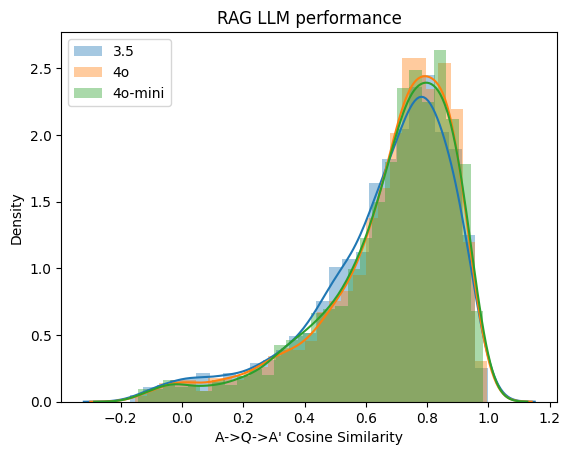

In [32]:
sns.distplot(df_gpt35['cosine'], label='3.5')
sns.distplot(df_gpt4o['cosine'], label='4o')
sns.distplot(df_gpt4o_mini['cosine'], label='4o-mini')

plt.title("RAG LLM performance")
plt.xlabel("A->Q->A' Cosine Similarity")
plt.legend()